<a href="https://colab.research.google.com/github/rshaikh95/datasci_5_statistics/blob/main/RA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
# load in dataset
df = pd.read_csv('https://raw.githubusercontent.com/rshaikh95/datasci_5_statistics/main/datasets/healthcare-dataset-stroke-data.csv')

df.columns


Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [3]:
## vars of interest: Number of Beds, FTE - Employees on Payroll, Patient Revenue, Outpatient Revenue
df = df[['age', 'bmi', 'avg_glucose_level']]

# Remove any row with missing data
df = df.dropna()

# lets remove outliers, greater then 3 SDs from the mean
df = df[(df['age'] - df['age'].mean()) / df['age'].std() < 3]
df = df[(df['bmi'] - df['bmi'].mean()) / df['bmi'].std() < 3]
df = df[(df['avg_glucose_level'] - df['avg_glucose_level'].mean()) / df['avg_glucose_level'].std() < 3]


df.head(20)

## save
df.to_csv('https://raw.githubusercontent.com/rshaikh95/datasci_5_statistics/main/datasets/healthcare-dataset-stroke-data.csv')


The age predicts a patient's bmi and average glucose levels.

Null Hypothesis: H0: There is no relationship between the age of people and thier bmi.

Alternative Hypothesis: Ha: There is a relationship between the age of people and thier bmi.

In [4]:
# Define the dependent and independent variables
X = df['age']
y = df['bmi']


# Add a constant to the independent variable (required for the statsmodels regression model)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    bmi   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                     730.9
Date:                Sat, 14 Oct 2023   Prob (F-statistic):          2.30e-150
Time:                        03:05:18   Log-Likelihood:                -16488.
No. Observations:                5002   AIC:                         3.298e+04
Df Residuals:                    5000   BIC:                         3.299e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.7386      0.198    119.769      0.0

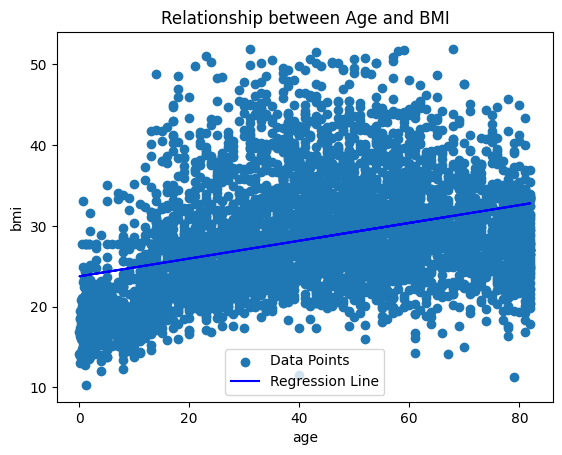

In [5]:
plt.scatter(df['age'], df['bmi'], label='Data Points')
plt.plot(df['age'], model.predict(X), color='blue', label='Regression Line')
plt.xlabel('age')
plt.ylabel('bmi')
plt.title('Relationship between Age and BMI')
plt.legend()
plt.show()

For this regression analysis I used a Stroke Prediction Dataset from Kaggle (link in read me of repo).I removed outliers and dropped rows with missing data. I defined the dependent variable bmi and independent variable age I wanted to see if there is a relationship between age and bmi. I created a model summary of the analysis and created the graph which showed the following.

The bmi of a person increases as they age. The analysis showed a positive relationship between age and bmi so we reject the null hypothesis and accept the alternative hypothesis.